<a href="https://colab.research.google.com/github/dibyansh01/GDP-PER_CAPITA-prediction-model/blob/main/GDP_PREDICTION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/rain_data/India_GDP_1960-2022.csv')
data

,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,NaN,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,0.0,2021,3173.4,182160,8.95
2,1.0,2020,2667.69,154640,-6.6
3,2.0,2019,2831.55,165760,3.74
4,3.0,2018,2702.93,159840,6.45
...,...,...,...,...,...
58,57.0,1964,56.48,9280,7.45
59,58.0,1963,48.42,8080,5.99
60,59.0,1962,42.16,7200,2.93
61,60.0,1961,39.23,6800,3.72


In [ ]:
data.shape

(63, 5)

In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)
data

,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,2021,3173.4,182160,8.95
2,2020,2667.69,154640,-6.6
3,2019,2831.55,165760,3.74
4,2018,2702.93,159840,6.45
...,...,...,...,...
58,1964,56.48,9280,7.45
59,1963,48.42,8080,5.99
60,1962,42.16,7200,2.93
61,1961,39.23,6800,3.72


In [ ]:
data = data.rename(columns={'India GDP - Historical Data': 'Year' ,
                        'India GDP - Historical Data.1' : 'GDP',
                       'India GDP - Historical Data.2' : 'Per Capita',
                       'India GDP - Historical Data.3': 'Growth %'})
data

,Year,GDP,Per Capita,Growth %
0,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,2021,3173.4,182160,8.95
2,2020,2667.69,154640,-6.6
3,2019,2831.55,165760,3.74
4,2018,2702.93,159840,6.45
...,...,...,...,...
58,1964,56.48,9280,7.45
59,1963,48.42,8080,5.99
60,1962,42.16,7200,2.93
61,1961,39.23,6800,3.72


In [ ]:
data.set_index('Year', inplace = True)
data

,GDP,Per Capita,Growth %
Year,,,
Year,GDP in (Billion) $,Per Capita in rupees,Growth %
2021,3173.4,182160,8.95
2020,2667.69,154640,-6.6
2019,2831.55,165760,3.74
2018,2702.93,159840,6.45
...,...,...,...
1964,56.48,9280,7.45
1963,48.42,8080,5.99
1962,42.16,7200,2.93


In [ ]:
data.describe()

,GDP,Per Capita,Growth %
count,63,63,63
unique,63,60,61
top,GDP in (Billion) $,27680,7.86
freq,1,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, Year to 1960
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   GDP         63 non-null     object
 1   Per Capita  63 non-null     object
 2   Growth %    63 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [ ]:
data.isna().values.any()

False

In [ ]:
data.duplicated().values.any()

False

In [ ]:
data = data.sort_values(by='Year', ascending=True)
data

,GDP,Per Capita,Growth %
Year,,,
1960,37.03,6560,0
1961,39.23,6800,3.72
1962,42.16,7200,2.93
1963,48.42,8080,5.99
1964,56.48,9280,7.45
...,...,...,...
2018,2702.93,159840,6.45
2019,2831.55,165760,3.74
2020,2667.69,154640,-6.6


In [ ]:
data = data.apply(pd.to_numeric, errors='coerce') #to convert object type into numeric
data

,GDP,Per Capita,Growth %
Year,,,
1960,37.03,6560.0,0.00
1961,39.23,6800.0,3.72
1962,42.16,7200.0,2.93
1963,48.42,8080.0,5.99
1964,56.48,9280.0,7.45
...,...,...,...
2018,2702.93,159840.0,6.45
2019,2831.55,165760.0,3.74
2020,2667.69,154640.0,-6.60


In [ ]:
data = data.dropna()
data

,GDP,Per Capita,Growth %
Year,,,
1960,37.03,6560.0,0.00
1961,39.23,6800.0,3.72
1962,42.16,7200.0,2.93
1963,48.42,8080.0,5.99
1964,56.48,9280.0,7.45
...,...,...,...
2017,2651.47,158480.0,6.80
2018,2702.93,159840.0,6.45
2019,2831.55,165760.0,3.74


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 1960 to 2021
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GDP         62 non-null     float64
 1   Per Capita  62 non-null     float64
 2   Growth %    62 non-null     float64
dtypes: float64(3)
memory usage: 1.9+ KB


In [ ]:
fig = px.line(data, x=data.index, y='GDP', title='GDP (in Billion $) Growth from 1960 to 2021')
fig.update_traces(mode='lines+markers',line=dict(color='Purple'))
fig.update(layout=dict(title=dict(x=0.5)))
fig.show()

In [ ]:
fig = px.line(data, x=data.index, y='Per Capita', title='Per Capita (in rupees) Growth from 1960 to 2021')
fig.update_traces(mode='lines+markers',line=dict(color='Purple'))
fig.update(layout=dict(title=dict(x=0.5)))
fig.show()

In [ ]:
fig = px.line(data, x=data.index, y='Growth %', title='Growth % from 1960 to 2021')
fig.update_traces(mode='lines+markers',line=dict(color='Purple'))
fig.update(layout=dict(title=dict(x=0.5)))
fig.show()

GDP Prediction Model


The Augmented Dickey-Fuller (ADF) test is used in ARIMA modeling to determine the stationarity of a time series. Stationarity is an important assumption for ARIMA models as it ensures that the statistical properties of the time series, such as mean and variance, remain constant over time. The ADF test helps in identifying non-stationary time series, which require differencing to achieve stationarity before applying ARIMA modeling.

In [ ]:
res = adfuller(data['GDP'])
print(res)
print(f"ADF Test Statistic:{res[0]}, p-value: {res[1]}")


(2.14818511903624, 0.9988370923940496, 10, 51, {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}, 593.3716673115671)
ADF Test Statistic:2.14818511903624, p-value: 0.9988370923940496


p value is > 0.05, means it is non stationary. To apply ARIMA model we need to make it stationary.

In [ ]:
#first differecing
data['First Difference'] = data['GDP'] - data['GDP'].shift(1)
res1 = adfuller(data['First Difference'].dropna())
print(f"ADF Test Statistic:{res1[0]}, p-value: {res1[1]}")

ADF Test Statistic:1.7367005046994226, p-value: 0.998214851561891


<ipython-input-63-bed42eef676e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Year'>

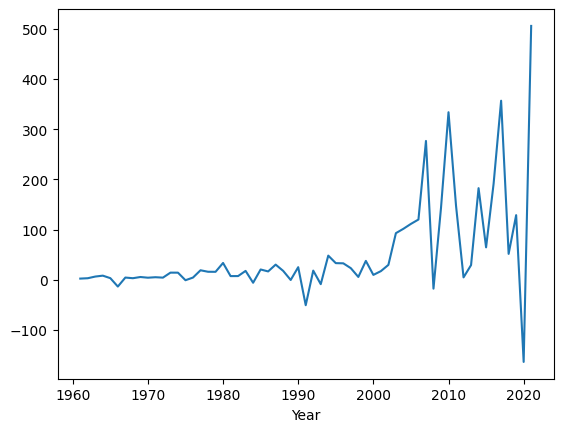

In [ ]:
data['First Difference'].plot()

Still p > 0.05

In [ ]:
#second differecing
data['Second Difference'] = data['First Difference'] - data['First Difference'].shift(1)
res2 = adfuller(data['First Difference'].dropna())
print(f"ADF Test Statistic:{res2[0]}, p-value: {res2[1]}")

ADF Test Statistic:1.7367005046994226, p-value: 0.998214851561891


<ipython-input-23-d9b70b4b1725>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Year'>

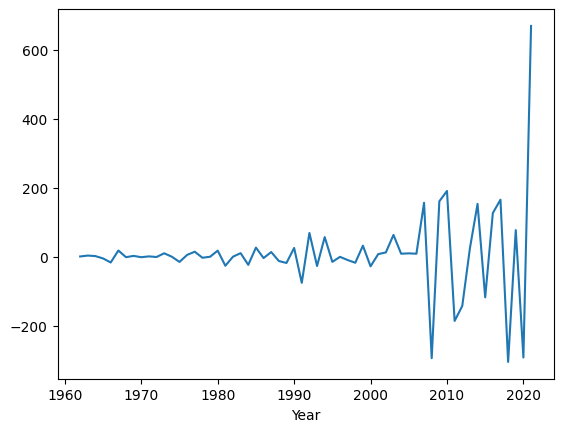

In [ ]:
data['Second Difference'].plot()

Still p > 0.05

In [ ]:
data['Third Difference'] = data['Second Difference'] - data['Second Difference'].shift(1)
res3 = adfuller(data['Third Difference'].dropna())
print(f"ADF Test Statistic:{res3[0]}, p-value: {res3[1]}")

ADF Test Statistic:-4.859517737791944, p-value: 4.178617461258252e-05


<ipython-input-25-67841dc5ec86>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Year'>

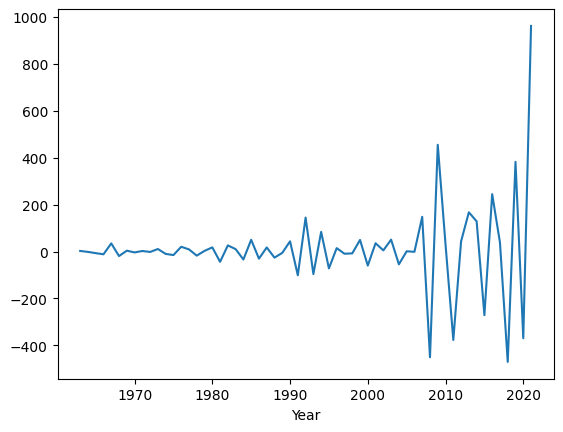

In [ ]:
data['Third Difference'].plot()

Now p value is less than 0.05, means we can use ARIMA model

finding p,q values from ACF and PACF graphs

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



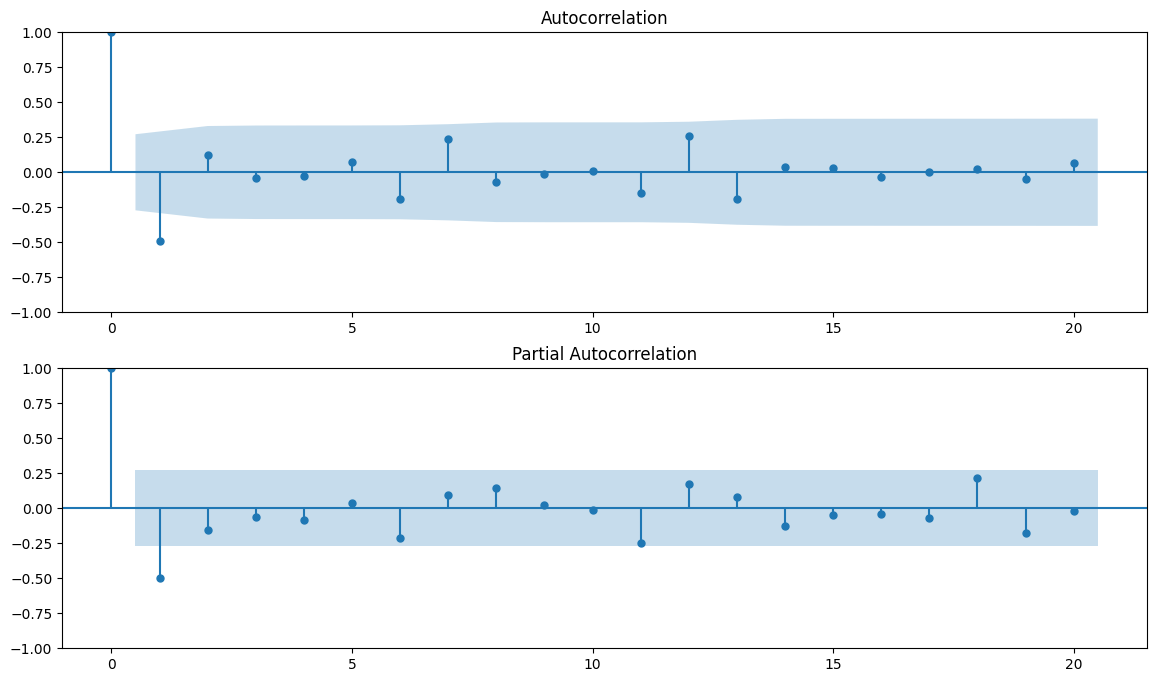

In [ ]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(data['Third Difference'].iloc[10:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(data['Third Difference'].iloc[10:],lags=20,ax=ax2)

single spike in ACF, means p = 1
single spike in PACF, means q = 1
We need to take 3 diffrences so value of d = 3

ARIMA Modelling:

In [ ]:
# order=(1,3,1) represets values of p, d, q
gdpmodel = ARIMA(data['GDP'],order=(1,3,1)) # values of p, d, q
gdpmodel_fit = gdpmodel.fit()
gdpmodel_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   62
Model:                 ARIMA(1, 3, 1)   Log Likelihood                -362.363
Date:                Mon, 29 May 2023   AIC                            730.726
Time:                        19:17:41   BIC                            736.959
Sample:                    01-01-1960   HQIC                           733.159
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7057      0.083     -8.538      0.000      -0.868      -0.544
ma.L1         -0.9979      1.570     -0.636      0.525      -4.075       2.080
sigma2      1.155e+04    1.8e+04      0.643      0.520   -2.37e+04    4.68e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.64   Jarque-Bera (JB):                98.78
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):             297.35   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
gdpmodel_fit.fittedvalues

Year
1960       0.000000
1961      74.198695
1962      36.889623
1963      43.928059
1964      55.395407
           ...     
2017    2400.847893
2018    2900.218053
2019    2975.102443
2020    2908.517213
2021    2708.881675
Length: 62, dtype: float64

In [ ]:
gdpmodel_df = pd.DataFrame(gdpmodel_fit.fittedvalues)
data['gdpmodel'] = gdpmodel_df.values
data

<ipython-input-49-0bf838a93e37>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,GDP,Per Capita,Growth %,First Difference,Second Difference,Third Difference,gdpmodel
Year,,,,,,,
1960,37.03,6560.0,0.00,NaN,NaN,NaN,0.000000
1961,39.23,6800.0,3.72,2.20,NaN,NaN,74.198695
1962,42.16,7200.0,2.93,2.93,0.73,NaN,36.889623
1963,48.42,8080.0,5.99,6.26,3.33,2.60,43.928059
1964,56.48,9280.0,7.45,8.06,1.80,-1.53,55.395407
...,...,...,...,...,...,...,...
2017,2651.47,158480.0,6.80,356.67,165.46,38.71,2400.847893
2018,2702.93,159840.0,6.45,51.46,-305.21,-470.67,2900.218053
2019,2831.55,165760.0,3.74,128.62,77.16,382.37,2975.102443


In [ ]:
data['gdpresiduals'] = data.GDP - data.gdpmodel
data.head()

<ipython-input-51-9f88e1a9325e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,GDP,Per Capita,Growth %,First Difference,Second Difference,Third Difference,gdpmodel,gdpresiduals
Year,,,,,,,,
1960,37.03,6560.0,0.00,NaN,NaN,NaN,0.000000,37.030000
1961,39.23,6800.0,3.72,2.20,NaN,NaN,74.198695,-34.968695
1962,42.16,7200.0,2.93,2.93,0.73,NaN,36.889623,5.270377
1963,48.42,8080.0,5.99,6.26,3.33,2.60,43.928059,4.491941
1964,56.48,9280.0,7.45,8.06,1.80,-1.53,55.395407,1.084593


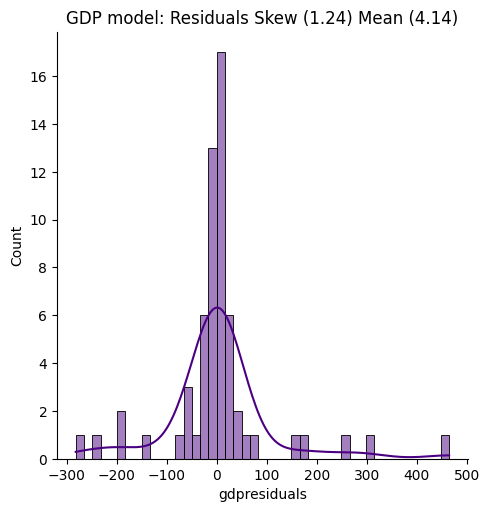

In [ ]:
# sns.kdeplot(data.gdpresiduals[2:])
# plt.title("Kernel Density Plot of Residuals")
# plt.xlabel("Residual Values")
# plt.ylabel("Density")
# plt.show()

resid_mean = round(data.gdpresiduals[1:].mean(), 2)
resid_skew = round(data.gdpresiduals[1:].skew(), 2)
sns.displot(data.gdpresiduals[1:], kde=True, color='indigo')
plt.title(f'GDP model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In the above model the mean and skew both values are significantly greater than 0. So it is good idea to use log transformaion here.

In [ ]:
data['First Difference'] = np.log(data['GDP']) - np.log(data['GDP'].shift(1))
res1 = adfuller(data['First Difference'].dropna())
print(f"ADF Test Statistic:{res1[0]}, p-value: {res1[1]}")

ADF Test Statistic:-7.345736362584532, p-value: 1.0368175546237404e-10


<ipython-input-91-86c953cde011>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
gdpmodel = ARIMA(np.log(data['GDP']),order=(1,1,1)) # values of p, d, q
gdpmodel_fit = gdpmodel.fit()
gdpmodel_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   62
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  62.578
Date:                Mon, 29 May 2023   AIC                           -119.156
Time:                        20:42:37   BIC                           -112.824
Sample:                    01-01-1960   HQIC                          -116.675
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.004    241.206      0.000       0.992       1.008
ma.L1         -0.9873      0.237     -4.166      0.000      -1.452      -0.523
sigma2         0.0072      0.002      4.576      0.000       0.004       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                35.32
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -1.12
Prob(H) (two-sided):                  0.58   Kurtosis:                         5.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Here P values are almost equal to zero, means terms are contributing significantly to the model.

In [ ]:
data['log_gdp'] = np.log(data.GDP)
data.head()

<ipython-input-103-81390741bc93>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,GDP,Per Capita,Growth %,First Difference,Second Difference,Third Difference,gdpmodel,gdpresiduals,log_gdp,log_gdppredicted,log_to_predicted_gdp
Year,,,,,,,,,,,
1960,37.03,6560.0,0.00,NaN,NaN,NaN,0.000000,NaN,3.611728,NaN,NaN
1961,39.23,6800.0,3.72,0.057713,NaN,NaN,74.198695,0.054956,3.669442,3.614486,37.132258
1962,42.16,7200.0,2.93,0.072030,0.73,NaN,36.889623,0.052925,3.741472,3.688547,39.986707
1963,48.42,8080.0,5.99,0.138441,3.33,2.60,43.928059,0.118876,3.879913,3.761037,42.992985
1964,56.48,9280.0,7.45,0.153974,1.80,-1.53,55.395407,0.115065,4.033887,3.918821,50.341071


In [ ]:
n_forecast = 62
predict = gdpmodel_fit.get_prediction(end=gdpmodel_fit.nobs)

data['log_gdppredicted'] = predict.predicted_mean[-n_forecast:]
data.log_gdppredicted



<ipython-input-104-0d82a5636fe1>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Year
1960         NaN
1961    3.611728
1962    3.694241
1963    3.780465
1964    3.941890
          ...   
2017    7.810867
2018    7.956769
2019    7.974902
2020    8.020868
2021    7.958700
Name: log_gdppredicted, Length: 62, dtype: float64

In [ ]:
data['log_to_predicted_gdp'] = np.e**data.log_gdppredicted
data.tail()

<ipython-input-105-9d25ae4c3793>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,GDP,Per Capita,Growth %,First Difference,Second Difference,Third Difference,gdpmodel,gdpresiduals,log_gdp,log_gdppredicted,log_to_predicted_gdp
Year,,,,,,,,,,,
2017,2651.47,158480.0,6.80,0.144469,165.46,38.71,2400.847893,0.121953,7.882869,7.810867,2467.269366
2018,2702.93,159840.0,6.45,0.019222,-305.21,-470.67,2900.218053,-0.013015,7.902092,7.956769,2854.834521
2019,2831.55,165760.0,3.74,0.046488,77.16,382.37,2975.102443,0.054231,7.948580,7.974902,2907.073077
2020,2667.69,154640.0,-6.60,-0.059611,-292.48,-369.64,2908.517213,-0.071681,7.888968,8.020868,3043.816948
2021,3173.40,182160.0,8.95,0.173591,669.57,962.05,2708.881675,0.198671,8.062559,7.958700,2860.351301


In [ ]:
data.rename(columns = {'Per Capita':'Per_capita'}, inplace = True)
data.columns

<ipython-input-131-0d2f43332431>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['GDP', 'Per_capita', 'Growth %', 'First Difference',
       'Second Difference', 'Third Difference', 'gdpmodel', 'gdpresiduals',
       'log_gdp', 'log_gdppredicted', 'log_to_predicted_gdp',
       'First Difference_ca'],
      dtype='object')

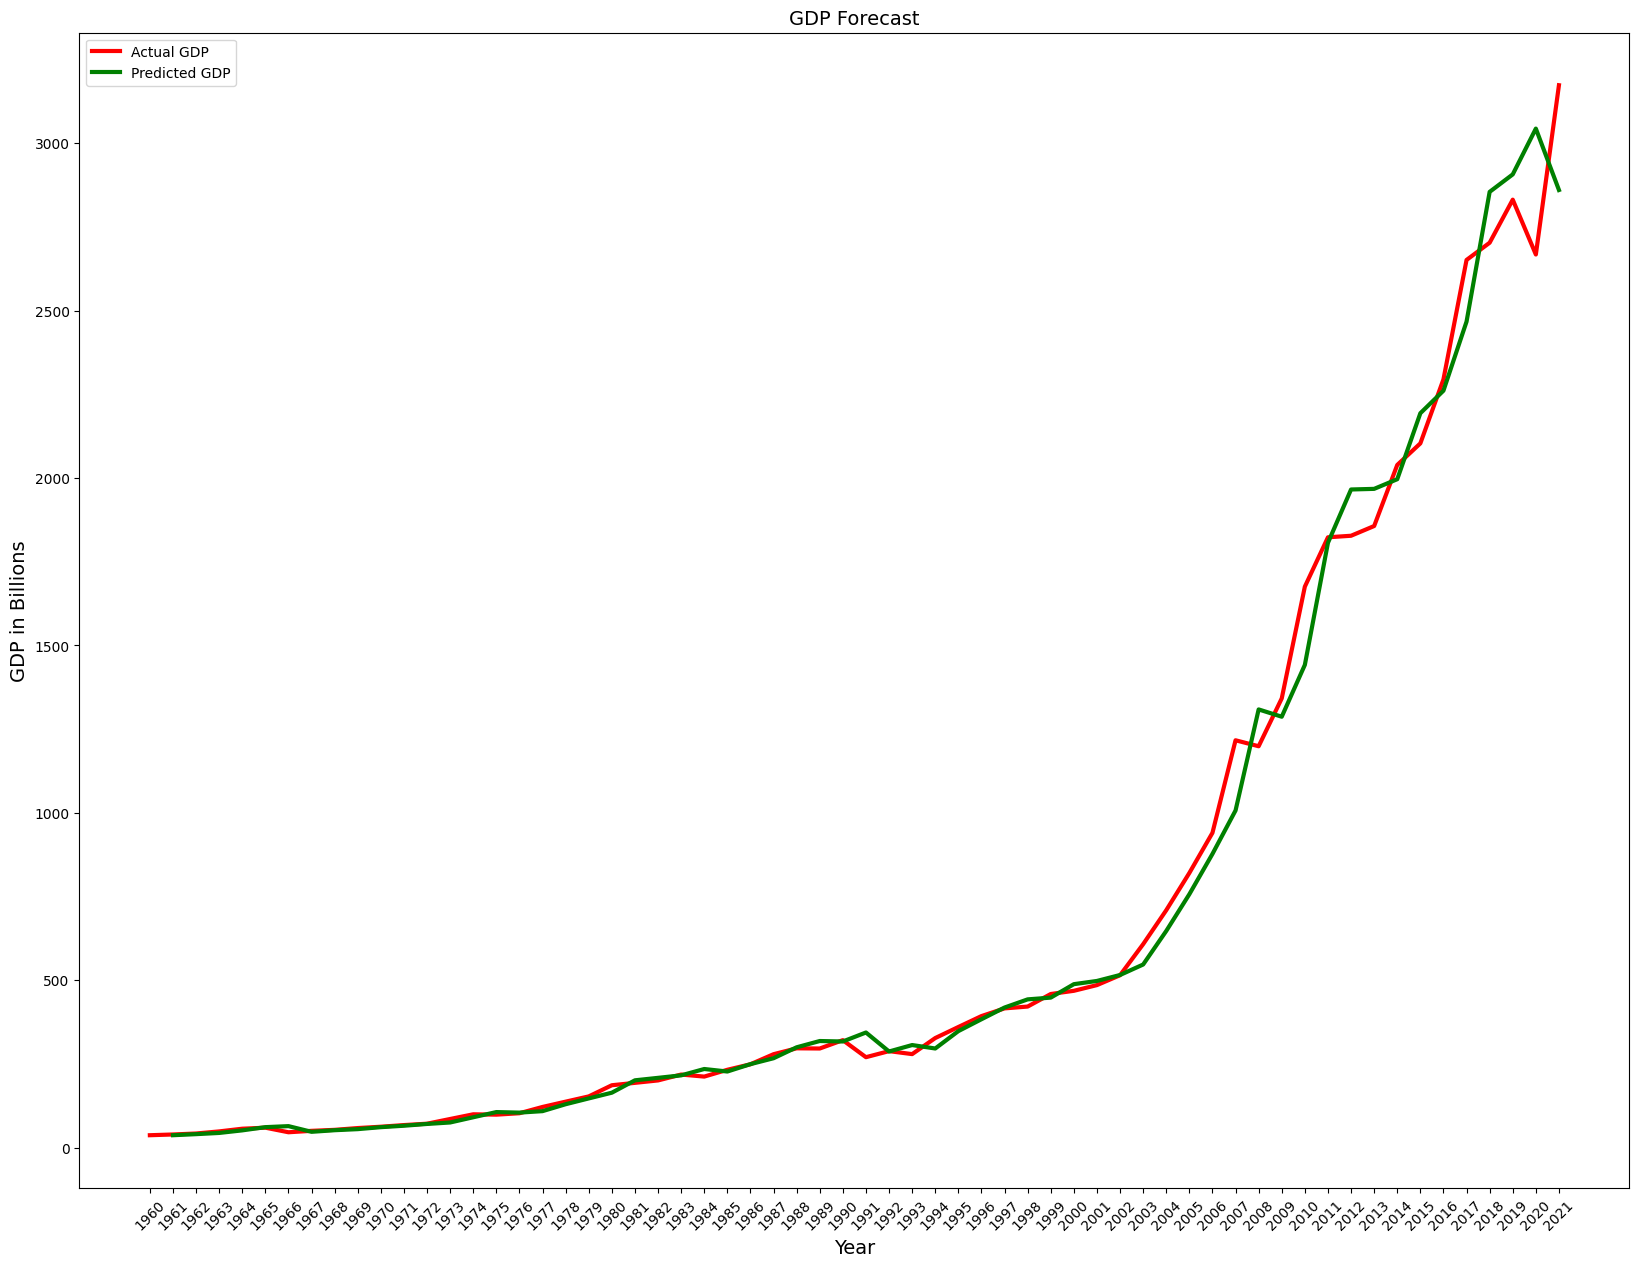

In [ ]:

plt.figure(figsize=(20,15))
plt.xticks(rotation =45)
plt.plot(data.index, data['GDP'], color='r', label='Actual GDP', lw = 3)
plt.plot(data.index, data.log_to_predicted_gdp, color='g', label='Predicted GDP', lw = 3)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("GDP in Billions", fontsize = 14)
plt.title("GDP Forecast", fontsize = 14)

plt.legend()


plt.show()

In [ ]:
forecast = np.e**(gdpmodel_fit.forecast(10))
forecast

2022-01-01    3409.317919
2023-01-01    3662.746095
2024-01-01    3934.982058
2025-01-01    4227.419329
2026-01-01    4541.554512
2027-01-01    4878.994905
2028-01-01    5241.466674
2029-01-01    5630.823629
2030-01-01    6049.056650
2031-01-01    6498.303802
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:

gdp_forecast = pd.DataFrame(forecast)
gdp_forecast.index = gdp_forecast.index.year
gdp_forecast


,predicted_mean
2022,3409.317919
2023,3662.746095
2024,3934.982058
2025,4227.419329
2026,4541.554512
2027,4878.994905
2028,5241.466674
2029,5630.823629
2030,6049.056650
2031,6498.303802


In [ ]:
bar = px.bar(x = gdp_forecast.index,
             y = gdp_forecast.predicted_mean,
             title = 'GDP Forecast',
             orientation = 'v',
             hover_name = gdp_forecast.index
             )
bar.update_layout(xaxis_title = 'Year',
                  yaxis_title='GDP in Billions')
bar.show()

In [ ]:
data['gdpresiduals'] = data.log_gdp - data.log_gdppredicted

<ipython-input-110-ea2c42ed1872>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



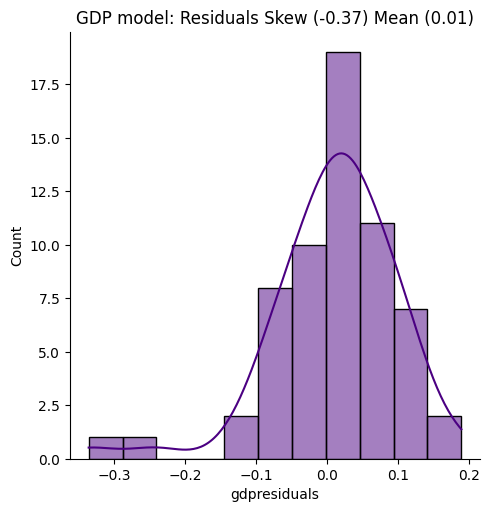

In [ ]:
resid_mean = round(data.gdpresiduals[10:].mean(), 2)
resid_skew = round(data.gdpresiduals[10:].skew(), 2)
sns.displot(data.gdpresiduals[1:], kde=True, color='indigo')
plt.title(f'GDP model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

The mean value = 0.01 represents good accuracy here.

Per Capita Income Prediction Model

In [ ]:
res = adfuller(np.log(data['Per Capita']))
print(res)
print(f"ADF Test Statistic:{res[0]}, p-value: {res[1]}")

(0.45796035411216424, 0.9835377435722524, 0, 61, {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}, -109.88562037914062)
ADF Test Statistic:0.45796035411216424, p-value: 0.9835377435722524


p value is > 0.05, means it is non stationary. To apply ARIMA model we need to make it stationary.

In [ ]:
#first differecing
data['First Difference_ca'] = np.log(data['Per Capita']) - np.log(data['Per Capita'].shift(1))
res1 = adfuller(data['First Difference_ca'].dropna())
print(f"ADF Test Statistic:{res1[0]}, p-value: {res1[1]}")

ADF Test Statistic:-7.263622549816104, p-value: 1.6567456357484765e-10


<ipython-input-116-6c35fcba7f7b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Year'>

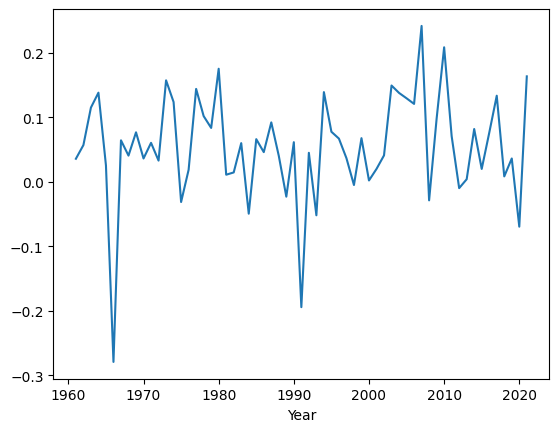

In [ ]:
data['First Difference_ca'].plot()

Now p value is less than 0.05, means we can use ARIMA model

finding p,q values from ACF and PACF graphs

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



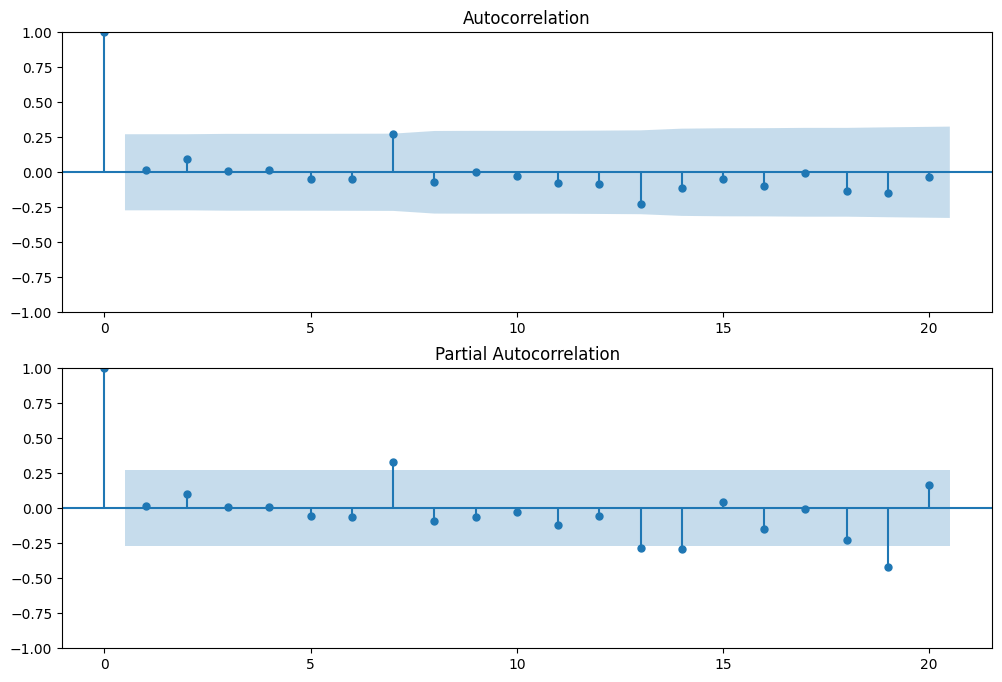

In [ ]:



fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(data['First Difference_ca'].iloc[10:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(data['First Difference_ca'].iloc[10:],lags=20,ax=ax2)

single spike in ACF, means p = 1 single spike in PACF, means q = 1 We have taken 1 diffrence so value of d = 1

ARIMA Modelling:

In [ ]:
# order=(1,3,1) represets values of p, d, q
capita_model= ARIMA(np.log(data['Per Capita']),order=(1,1,1)) # p, d, q
capita_model_fit= capita_model.fit()
capita_model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Per Capita   No. Observations:                   62
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  62.737
Date:                Mon, 29 May 2023   AIC                           -119.473
Time:                        20:48:06   BIC                           -113.141
Sample:                    01-01-1960   HQIC                          -116.991
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.007    138.035      0.000       0.986       1.014
ma.L1         -0.9855      0.188     -5.249      0.000      -1.353      -0.618
sigma2         0.0072      0.001      5.599      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                36.12
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -1.11
Prob(H) (two-sided):                  0.66   Kurtosis:                         6.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
percapita_df = pd.DataFrame()
percapita_df.index = data.index
percapita_df.insert(0, 'per_capita', data.Per_capita)
percapita_df['log_percapita'] = np.log(percapita_df.per_capita)

In [ ]:
n_forecast = 62
predict = capita_model_fit.get_prediction(end=gdpmodel_fit.nobs)

percapita_df['log_capita_predicted'] = predict.predicted_mean[-n_forecast:]
percapita_df['log_to_predicted_capita'] = np.e**percapita_df.log_capita_predicted
percapita_df



,per_capita,log_percapita,log_capita_predicted,log_to_predicted_capita
Year,,,,
1960,6560.0,8.788746,NaN,NaN
1961,6800.0,8.824678,8.788746,6560.000162
1962,7200.0,8.881836,8.834866,6869.629843
1963,8080.0,8.997147,8.902398,7349.575981
1964,9280.0,9.135617,9.034853,8390.477608
...,...,...,...,...
2017,158480.0,11.973384,11.892655,146188.915855
2018,159840.0,11.981929,12.028040,167382.991440
2019,165760.0,12.018296,12.035637,168659.434932


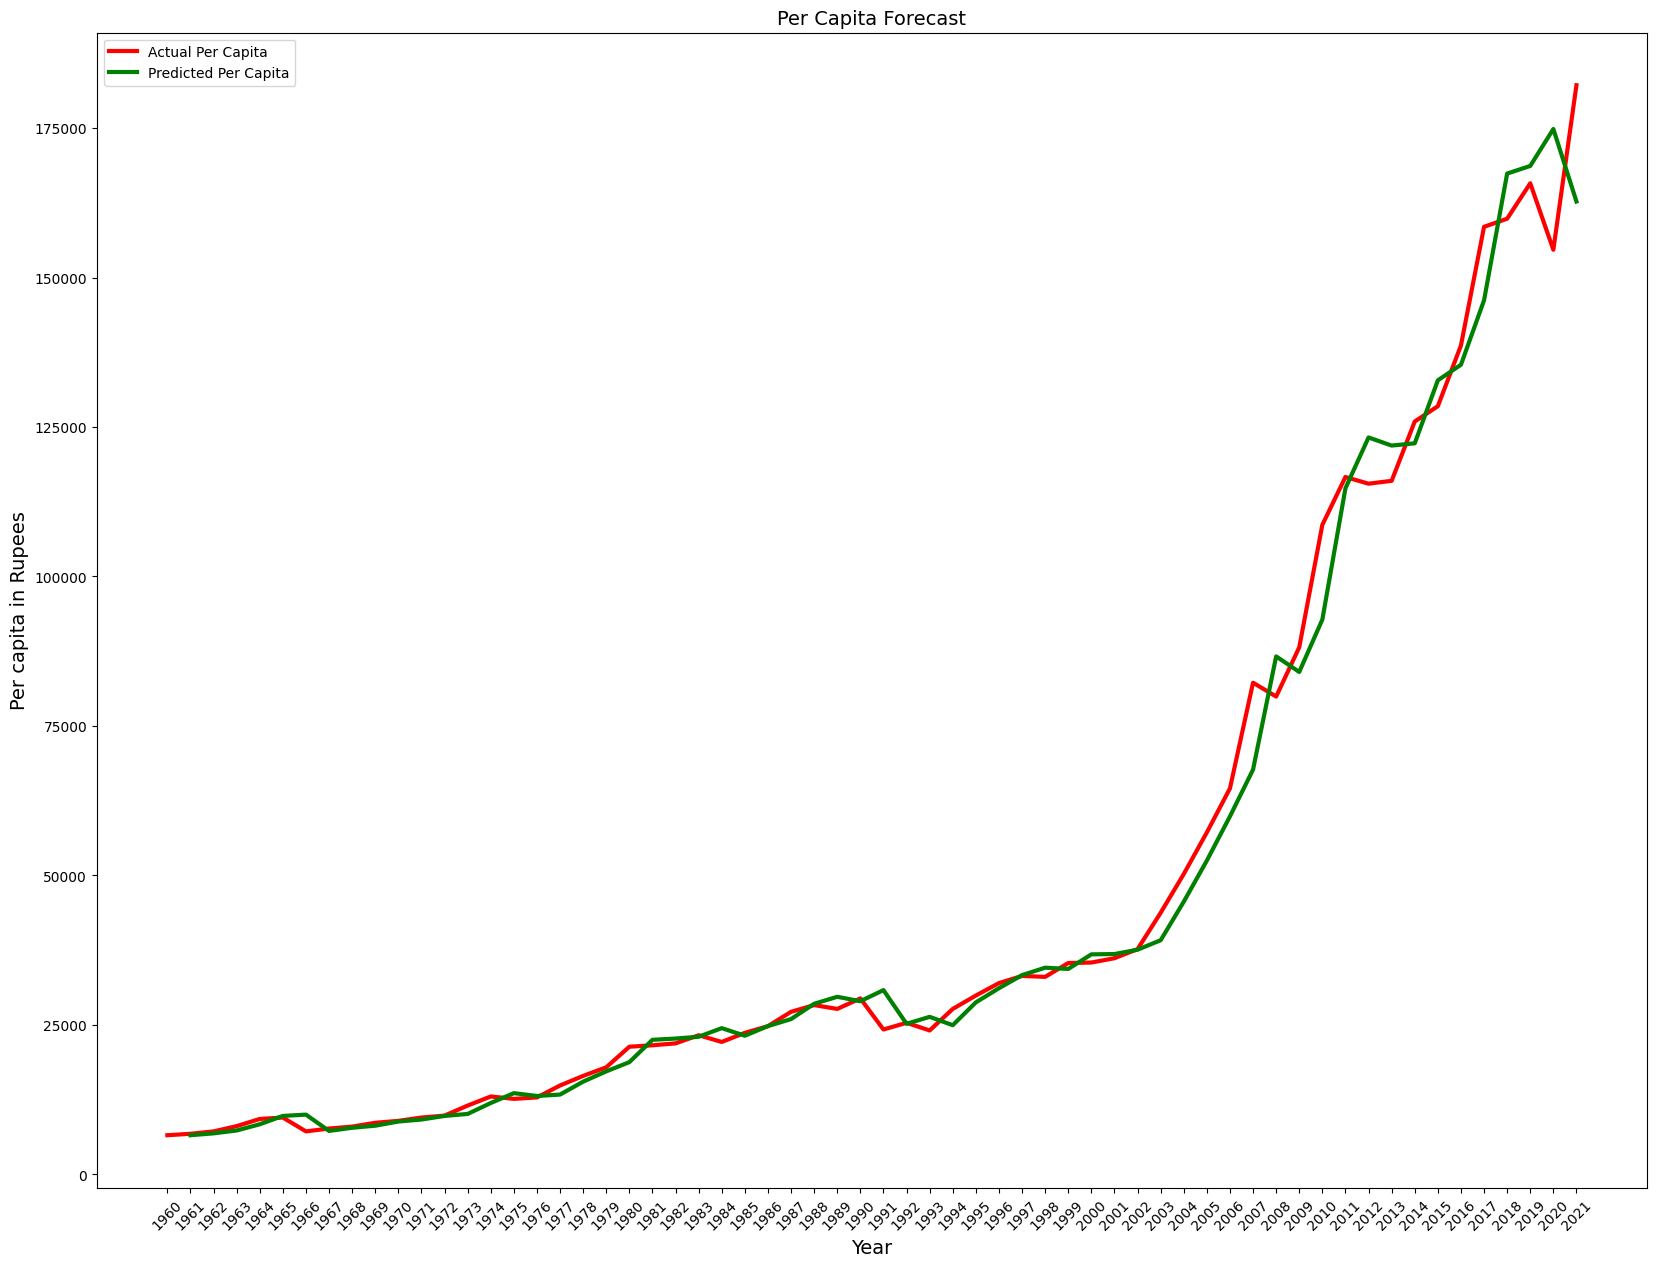

In [ ]:
n_forecast = 62
predict = capita_model_fit.get_prediction(end=capita_model_fit.nobs)



plt.figure(figsize=(20,15))
plt.xticks(rotation =45)
plt.plot(percapita_df.index, percapita_df['per_capita'], color='r', label='Actual Per Capita', lw = 3)
plt.plot(percapita_df.index, percapita_df.log_to_predicted_capita, color='g', label='Predicted Per Capita', lw = 3)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Per capita in Rupees", fontsize = 14)
plt.title("Per Capita Forecast", fontsize = 14)

plt.legend()

# ax.set(title='Forecast of GDP')
plt.show()

In [ ]:
forecast = np.e**capita_model_fit.forecast(10)
forecast

2022-01-01    192094.191764
2023-01-01    202567.255277
2024-01-01    213608.263425
2025-01-01    225247.849065
2026-01-01    237518.288270
2027-01-01    250453.587984
2028-01-01    264089.578338
2029-01-01    278464.009853
2030-01-01    293616.655801
2031-01-01    309589.419987
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [ ]:
capita_forecast = pd.DataFrame(forecast)
capita_forecast.index = capita_forecast.index.year
capita_forecast

,predicted_mean
2022,192094.191764
2023,202567.255277
2024,213608.263425
2025,225247.849065
2026,237518.288270
2027,250453.587984
2028,264089.578338
2029,278464.009853
2030,293616.655801
2031,309589.419987


In [ ]:
bar = px.bar(x = capita_forecast.index,
             y = capita_forecast.predicted_mean,
             title = 'Per capita Forecast',
             orientation = 'v',
             hover_name = capita_forecast.index
             )
bar.update_layout(xaxis_title = 'Year',
                  yaxis_title='Per capita in Rupees')
bar.show()

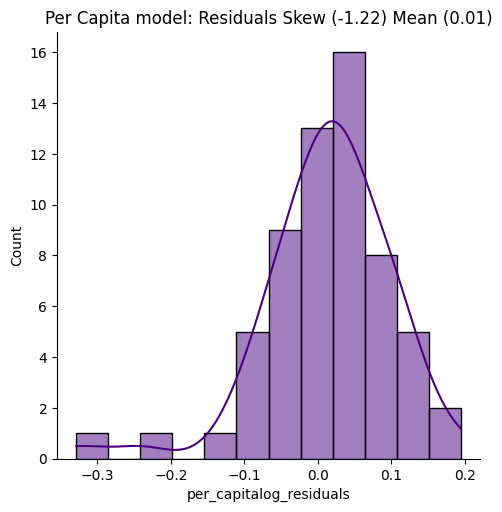

In [ ]:
percapita_df['per_capitalog_residuals'] = percapita_df.log_percapita - percapita_df.log_capita_predicted
resid_mean = round(percapita_df.per_capitalog_residuals[1:].mean(), 2)
resid_skew = round(percapita_df.per_capitalog_residuals[1:].skew(), 2)
sns.displot(percapita_df.per_capitalog_residuals[1:], kde=True, color='indigo')
plt.title(f'Per Capita model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()